# Calibracion Modelo Recolocado

In [1]:
# pip install sklearn.externals

In [2]:
# Librerias

import numpy as np # tratamiento de arreglos
import pandas as pd # tratamiento y carga de dataframes
import warnings # para ignorar las advertencias innecesarias de pandas
import matplotlib.pyplot as plt # Graficos y matriz de graficos
import seaborn as sns # Graficar las distribuciones
# from sklearn.model_selection import train_test_split # paraticion de la data
import missingno as msno # analissi de missing
# from sklearn.impute import SimpleImputer # imputacion simple
# from sklearn.preprocessing import MinMaxScaler # Estandarizacion

# import imblearn
# from imblearn.under_sampling import RandomUnderSampler # submuestreo
# from imblearn.over_sampling import RandomOverSampler # sobremuestreo
# # Modelos
# from sklearn.model_selection import GridSearchCV # Tuning de parametros
# from sklearn.ensemble import RandomForestClassifier # Random Forest

# from sklearn.metrics import roc_auc_score, roc_curve # AUC

# from xgboost import XGBClassifier as xgbc # clasificador

import datetime
# import sklearn.externals
# import joblib

In [3]:
warnings.filterwarnings('ignore')

## Funciones

In [4]:
def split_months(df, field):
    
    # meses y stocks
    months = sorted(df[field].value_counts().index)
    stocks = df[field].value_counts().sort_index().values

    # total de clientes
    total = sum(stocks)
    # porcentaje acumulado del primer mes
    perc_cum = [stocks[0]/total]

    # Construccion del vector porcentajes acumulados
    for i in range( 1, len(months) ):
        perc_cum.append(perc_cum[i-1] + stocks[i]/total) 

    # mes donde el porcentaje supera por primera vez el 70%
    month = months[ len( list( filter(lambda x: x <= .7, perc_cum) ) ) ]

    return month

def matrix_null(df):
    
    df_null = pd.DataFrame(df.isnull().sum(), columns=['frecuency'])
    df_null['perc_null'] = round(df_null['frecuency']/ df.shape[0], 4)

    return df_null

# def limites_inf_sup(df, var):

#     v_li = []
#     v_ls = []

#     for i in var:

#         vector = df[i]

#         p_0 = np.percentile(vector, 0)
#         p_1 = np.percentile(vector, 1)
#         p_99 = np.percentile(vector, 99)
#         p_100 = np.percentile(vector, 100)

#         if p_0 == 0: li = 0
#         else:
#             if (p_1 >= (2 * p_0)): li = p_1
#             else: li = p_0

#         if (p_100 >= (2 * p_99)): ls = p_99
#         else: ls = p_100

#         v_li.append(li)
#         v_ls.append(ls)

#     return pd.DataFrame([v_li, v_ls], index=['li','ls'], columns=var)

# # Dibuja la curva ROC
# def plot_roc_curve(y, y_proba, label = ''):
#     '''
#     dibujar la curva roc para las probabilidades y target entregados
    
#     params:
#     y: etiquetas originales
#     y_proba: probabilidades resultado del modelo
#     '''
    
#     auc_roc = roc_auc_score(y, y_proba)
#     fpr, tpr, thresholds = roc_curve(y, y_proba)
    
#     plt.figure(figsize=(8,6))
#     plt.rcParams.update({'font.size': 12})
#     plt.plot(fpr, fpr, c = 'red')
#     plt.plot(fpr, tpr, label= (f"Curva ROC {label} (AUC = {auc_roc:.4f})"))
#     plt.xlabel("FPR")
#     plt.ylabel("TPR")
#     plt.title(f"Curva ROC {label}")
#     plt.legend(loc=4, numpoints=1)

In [5]:
v_pd = pd.__version__
v_sns = sns.__version__
v_msno = msno.__version__
# v_skln = sklearn.__version__
# v_ibln = imblearn.__version__

In [6]:
# libraries = ['pandas', 'seaborn', 'missingno', 'sklearn', 'imblearn']
# versions = [v_pd, v_sns, v_msno, v_skln, v_ibln]
libraries = ['pandas', 'seaborn', 'missingno']
versions = [v_pd, v_sns, v_msno]

for i, j in zip(libraries, versions):
    print(f"{i} con version {j}")


pandas con version 1.1.5
seaborn con version 0.11.1
missingno con version 0.5.0


In [7]:
seed = 314159

In [8]:
base = pd.read_csv('../bases/construccion/base_axes_sinRepros_final_4.csv', sep=',')

In [9]:
base.shape

(6781, 339)

In [10]:
filtro_ind_insf = (base['indeterminado'] + base['insuficiente']) == 0
# filtro_repros_1 = (base['cosecha'] >= 202003) & (base['cosecha'] <= 202007) # fechas de repros por covid
# filtro_repros_2 = (base['cosecha'] >= 201904) & (base['cosecha'] <= 202002) # Sospechas de ser afectado por repros por covid
# filtro_repros_3 = (base['cosecha'] >= 202008) # Sin performance
# filtro_repros_4 = (base['cosecha'] >= 201811) # Sospechas de ser afectado por repros por covid

# Analisis con y sin repro
# filtro_repros_5 = (base['cosecha'] > 201908) # Axes sin Repro

# filtro analisis de perimetro
filtro_6 = (base['cosecha'] < 201410) # limite inferior
filtro_7 = (base['cosecha'] > 201908) # limite superior
# filtro perfil solo palanca y propietario
filtro_8 = base['perfil'].isin(['Taxista palanca','Taxista propietario'])

In [11]:
# recolocado = base[filtro_ind_insf & ~ filtro_repros_1 & ~ filtro_repros_2 & ~ filtro_repros_3 & ~ filtro_repros_4]
# recolocado = base[filtro_ind_insf & ~ filtro_repros_5]
recolocado = base[filtro_ind_insf & ~ filtro_6 & ~ filtro_7 & filtro_8]

In [12]:
recolocado.head(2)

,cosecha,activacion,cv,co,expediente,producto,malo,indeterminado,insuficiente,edad,...,linea_activa_max1m6_max7m12,por_uso_linea_1m_max2m12,por_uso_linea_max1m3_max4m12,por_uso_linea_max1m6_max7m12,por_uso_efectivo_1m_max2m12,por_uso_efectivo_max1m3_max4m12,por_uso_efectivo_max1m6_max7m12,por_me_1m_max2m12,por_me_max1m3_max4m12,por_me_max1m6_max7m12
180,201410,31/10/2014,B8957002,B8957002,25696690,Recolocado,0,0,0,42,...,Menor linea_activa,Cien por_uso_linea,Cien por_uso_linea,Cien por_uso_linea,Cero por_uso_efectivo,Cero por_uso_efectivo,Cero por_uso_efectivo,Cero por_me,Cero por_me,Cero por_me
181,201410,7/10/2014,C4115002,C4115002,25674408,Recolocado,0,0,0,48,...,Cero linea_activa,Cero por_uso_linea,Cero por_uso_linea,Cero por_uso_linea,Cero por_uso_efectivo,Cero por_uso_efectivo,Cero por_uso_efectivo,Cero por_me,Cero por_me,Cero por_me


In [13]:
recolocado.shape

(4150, 339)

## Mes del train

In [14]:
print( f"La cosecha { split_months(recolocado, 'cosecha') } contiene al Train" )

La cosecha 201806 contiene al Train


In [15]:
month_split = split_months(recolocado, 'cosecha')

In [16]:
train_count = recolocado[recolocado['cosecha'] <= month_split]['cosecha'].count()
test_count = recolocado[recolocado['cosecha'] > month_split]['cosecha'].count()
train_tm = recolocado[recolocado['cosecha'] <= month_split]['malo'].mean()
test_tm = recolocado[recolocado['cosecha'] > month_split]['malo'].mean()

In [17]:
print(f"Porcentaje del Train: { round(train_count * 100/ recolocado['cosecha'].count(), 2) }% ({train_count}), con tasa de Malos: {round(train_tm*100, 2)}%")

Porcentaje del Train: 70.22% (2914), con tasa de Malos: 26.18%


In [18]:
print(f"Porcentaje del Test: { round(test_count * 100/ recolocado['cosecha'].count(), 2) }% ({test_count}), con tasa de Malos: {round(test_tm*100, 2)}%")

Porcentaje del Test: 29.78% (1236), con tasa de Malos: 22.49%


In [19]:
eje = ['cosecha', 'activacion', 'cv', 'co', 'expediente', 'producto', 'indeterminado', 'insuficiente']
demo = ['edad', 'educacion', 'estado_civil', 'vivienda', 'perfil', 'carga_fam', 'ingreso']
inter = ['antiguedad', 'cuotas_pend', 'cuotas_canc', 'saldo_cap', 'saldo_int', 'saldo_mora', 'provision', 
    'garpref', 'cap_vig', 'cap_ref', 'cap_ven', 'cap_jud', 'mora_prom1m6', 'mora', 'calificacion_conalin',
    'calificacion_sinalin', 'sobreend', 'riesgocc', 'refin', 'refinanciacion', 'im_pagcof', 'carga_gnv',
    'nro_carga_gnv', 'cv_carga_gnv', 'relacion_im_pagcof_cuota', 'relacion_carga_gnv_cuota']
rcc = recolocado.drop(eje + demo + inter + ['malo'], axis = 1).columns.to_list()
target = ['malo']

In [20]:
recolocado[eje + demo + inter + rcc + target].head(2)

,cosecha,activacion,cv,co,expediente,producto,indeterminado,insuficiente,edad,educacion,...,por_uso_linea_1m_max2m12,por_uso_linea_max1m3_max4m12,por_uso_linea_max1m6_max7m12,por_uso_efectivo_1m_max2m12,por_uso_efectivo_max1m3_max4m12,por_uso_efectivo_max1m6_max7m12,por_me_1m_max2m12,por_me_max1m3_max4m12,por_me_max1m6_max7m12,malo
180,201410,31/10/2014,B8957002,B8957002,25696690,Recolocado,0,0,42,Secundaria completa,...,Cien por_uso_linea,Cien por_uso_linea,Cien por_uso_linea,Cero por_uso_efectivo,Cero por_uso_efectivo,Cero por_uso_efectivo,Cero por_me,Cero por_me,Cero por_me,0
181,201410,7/10/2014,C4115002,C4115002,25674408,Recolocado,0,0,48,Secundaria completa,...,Cero por_uso_linea,Cero por_uso_linea,Cero por_uso_linea,Cero por_uso_efectivo,Cero por_uso_efectivo,Cero por_uso_efectivo,Cero por_me,Cero por_me,Cero por_me,0


In [21]:
X = recolocado.drop(eje + target, axis = 1)
y = recolocado[target]

In [22]:
X.head(2)

,edad,educacion,estado_civil,vivienda,perfil,carga_fam,ingreso,maf,ci,cuota,...,linea_activa_max1m6_max7m12,por_uso_linea_1m_max2m12,por_uso_linea_max1m3_max4m12,por_uso_linea_max1m6_max7m12,por_uso_efectivo_1m_max2m12,por_uso_efectivo_max1m3_max4m12,por_uso_efectivo_max1m6_max7m12,por_me_1m_max2m12,por_me_max1m3_max4m12,por_me_max1m6_max7m12
180,42,Secundaria completa,Conviviente,FAMILIAR,Taxista propietario,3.0,NaN,NaN,NaN,NaN,...,Menor linea_activa,Cien por_uso_linea,Cien por_uso_linea,Cien por_uso_linea,Cero por_uso_efectivo,Cero por_uso_efectivo,Cero por_uso_efectivo,Cero por_me,Cero por_me,Cero por_me
181,48,Secundaria completa,Soltero,FAMILIAR,Taxista propietario,3.0,NaN,NaN,NaN,NaN,...,Cero linea_activa,Cero por_uso_linea,Cero por_uso_linea,Cero por_uso_linea,Cero por_uso_efectivo,Cero por_uso_efectivo,Cero por_uso_efectivo,Cero por_me,Cero por_me,Cero por_me


In [23]:
y.mean()

malo    0.250843
dtype: float64

## División en train y test

In [24]:
filtro_division = recolocado['cosecha'] <= month_split

In [25]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = seed, stratify = y)
X_train = recolocado[filtro_division].drop(eje + target, axis = 1)
X_test = recolocado[~ filtro_division].drop(eje + target, axis = 1)
y_train = recolocado[filtro_division][target]
y_test = recolocado[~ filtro_division][target]

In [26]:
train_plot = pd.DataFrame(recolocado[filtro_division][['cosecha','malo']])
frec_train = train_plot.groupby(['cosecha'])['cosecha'].count()
tm_train = train_plot.groupby(['cosecha'])['malo'].mean()
train_plot = pd.concat([frec_train, tm_train], axis = 1).sort_index()
train_plot['fecha'] = train_plot.index.values
train_plot.columns = ['frec_train', 'tm_train', 'cosecha']

test_plot = pd.DataFrame(recolocado[~ filtro_division][['cosecha','malo']])
frec_test = test_plot.groupby(['cosecha'])['cosecha'].count()
tm_test = test_plot.groupby(['cosecha'])['malo'].mean()
test_plot = pd.concat([frec_test, tm_test], axis = 1).sort_index()
test_plot['fecha'] = test_plot.index.values
test_plot.columns = ['frec_test', 'tm_test', 'cosecha']

df_plot = pd.concat([train_plot[['frec_train','tm_train']], test_plot[['frec_test','tm_test']]], axis = 1)

df_plot['fecha'] = [datetime.datetime.strptime(str(i), "%Y%m").strftime("%Y-%b") for i in df_plot.index.values]

print(df_plot)

         frec_train  tm_train  frec_test   tm_test     fecha
cosecha                                                     
201410         11.0  0.090909        NaN       NaN  2014-Oct
201411         25.0  0.160000        NaN       NaN  2014-Nov
201412         33.0  0.181818        NaN       NaN  2014-Dec
201501         33.0  0.242424        NaN       NaN  2015-Jan
201502         31.0  0.193548        NaN       NaN  2015-Feb
201503         12.0  0.333333        NaN       NaN  2015-Mar
201504         19.0  0.210526        NaN       NaN  2015-Apr
201505         25.0  0.120000        NaN       NaN  2015-May
201506         37.0  0.081081        NaN       NaN  2015-Jun
201507         40.0  0.150000        NaN       NaN  2015-Jul
201508         67.0  0.089552        NaN       NaN  2015-Aug
201509         68.0  0.073529        NaN       NaN  2015-Sep
201510         47.0  0.191489        NaN       NaN  2015-Oct
201511         57.0  0.192982        NaN       NaN  2015-Nov
201512         42.0  0.1

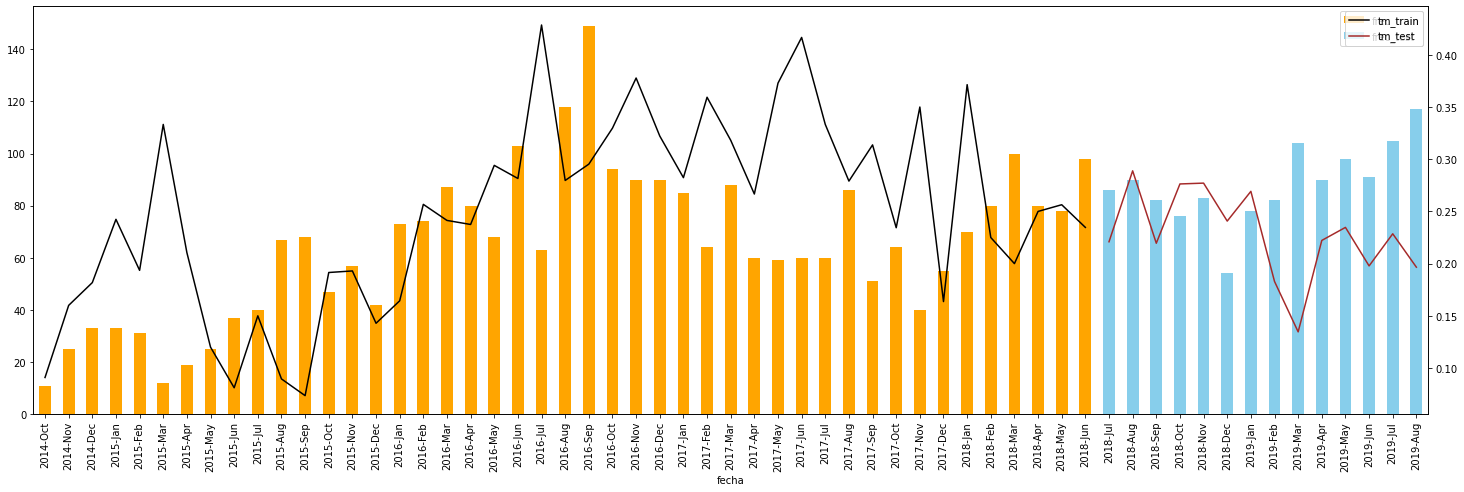

In [27]:
fig, ax = plt.subplots(figsize=(25,7.5))
ax2 = ax.twinx()
df_plot.plot.bar(x = 'fecha', y = 'frec_train', ax = ax, color = 'orange')
df_plot.plot(x = 'fecha', y = 'tm_train', ax = ax2, color = 'black')
df_plot.plot.bar(x = 'fecha', y = 'frec_test', ax = ax, color = 'skyblue')
df_plot.plot(x = 'fecha', y = 'tm_test', ax = ax2, color = 'brown')
plt.show()

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2914, 330), (1236, 330), (2914, 1), (1236, 1))

In [29]:
X_train.head(2)

,edad,educacion,estado_civil,vivienda,perfil,carga_fam,ingreso,maf,ci,cuota,...,linea_activa_max1m6_max7m12,por_uso_linea_1m_max2m12,por_uso_linea_max1m3_max4m12,por_uso_linea_max1m6_max7m12,por_uso_efectivo_1m_max2m12,por_uso_efectivo_max1m3_max4m12,por_uso_efectivo_max1m6_max7m12,por_me_1m_max2m12,por_me_max1m3_max4m12,por_me_max1m6_max7m12
180,42,Secundaria completa,Conviviente,FAMILIAR,Taxista propietario,3.0,NaN,NaN,NaN,NaN,...,Menor linea_activa,Cien por_uso_linea,Cien por_uso_linea,Cien por_uso_linea,Cero por_uso_efectivo,Cero por_uso_efectivo,Cero por_uso_efectivo,Cero por_me,Cero por_me,Cero por_me
181,48,Secundaria completa,Soltero,FAMILIAR,Taxista propietario,3.0,NaN,NaN,NaN,NaN,...,Cero linea_activa,Cero por_uso_linea,Cero por_uso_linea,Cero por_uso_linea,Cero por_uso_efectivo,Cero por_uso_efectivo,Cero por_uso_efectivo,Cero por_me,Cero por_me,Cero por_me


In [30]:
X_test.head(2)

,edad,educacion,estado_civil,vivienda,perfil,carga_fam,ingreso,maf,ci,cuota,...,linea_activa_max1m6_max7m12,por_uso_linea_1m_max2m12,por_uso_linea_max1m3_max4m12,por_uso_linea_max1m6_max7m12,por_uso_efectivo_1m_max2m12,por_uso_efectivo_max1m3_max4m12,por_uso_efectivo_max1m6_max7m12,por_me_1m_max2m12,por_me_max1m3_max4m12,por_me_max1m6_max7m12
3173,50,Secundaria completa,Casado,FAMILIAR,Taxista propietario,0.0,3461.0,29395.0,1500.0,1012.0,...,Menor linea_activa,Menor por_uso_linea,Mayor por_uso_linea,Mayor por_uso_linea,Cero por_uso_efectivo,Cero por_uso_efectivo,Cero por_uso_efectivo,Cero por_me,Cero por_me,Cero por_me
3174,45,Secundaria completa,Casado,PROPIO,Taxista palanca,2.0,3461.0,35297.0,1500.0,1334.0,...,Cero linea_activa,Cero por_uso_linea,Cero por_uso_linea,Cero por_uso_linea,Cero por_uso_efectivo,Cero por_uso_efectivo,Cero por_uso_efectivo,Cero por_me,Cero por_me,Cero por_me


In [31]:
y_train.mean()

malo    0.261839
dtype: float64

In [32]:
y_test.mean()

malo    0.224919
dtype: float64

## Exploración

In [33]:
X_train[demo].dtypes

edad              int64
educacion        object
estado_civil     object
vivienda         object
perfil           object
carga_fam       float64
ingreso         float64
dtype: object

In [34]:
X_train[demo].describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

,edad,carga_fam,ingreso
count,2914.000000,2914.000000,2409.000000
mean,36.749142,1.652711,3545.551266
std,10.318172,1.270022,78.213530
min,20.000000,0.000000,3000.000000
1%,21.000000,0.000000,3334.000000
5%,23.000000,0.000000,3461.000000
10%,24.000000,0.000000,3461.000000
25%,28.000000,1.000000,3461.000000
50%,36.000000,2.000000,3597.000000
75%,43.000000,3.000000,3597.000000


In [35]:
X_train[demo].describe(include = 'object')

,educacion,estado_civil,vivienda,perfil
count,2909,2914,2914,2914
unique,8,5,3,2
top,Secundaria completa,Soltero,FAMILIAR,Taxista palanca
freq,2737,1139,2330,2499


### Graficos Demograficas

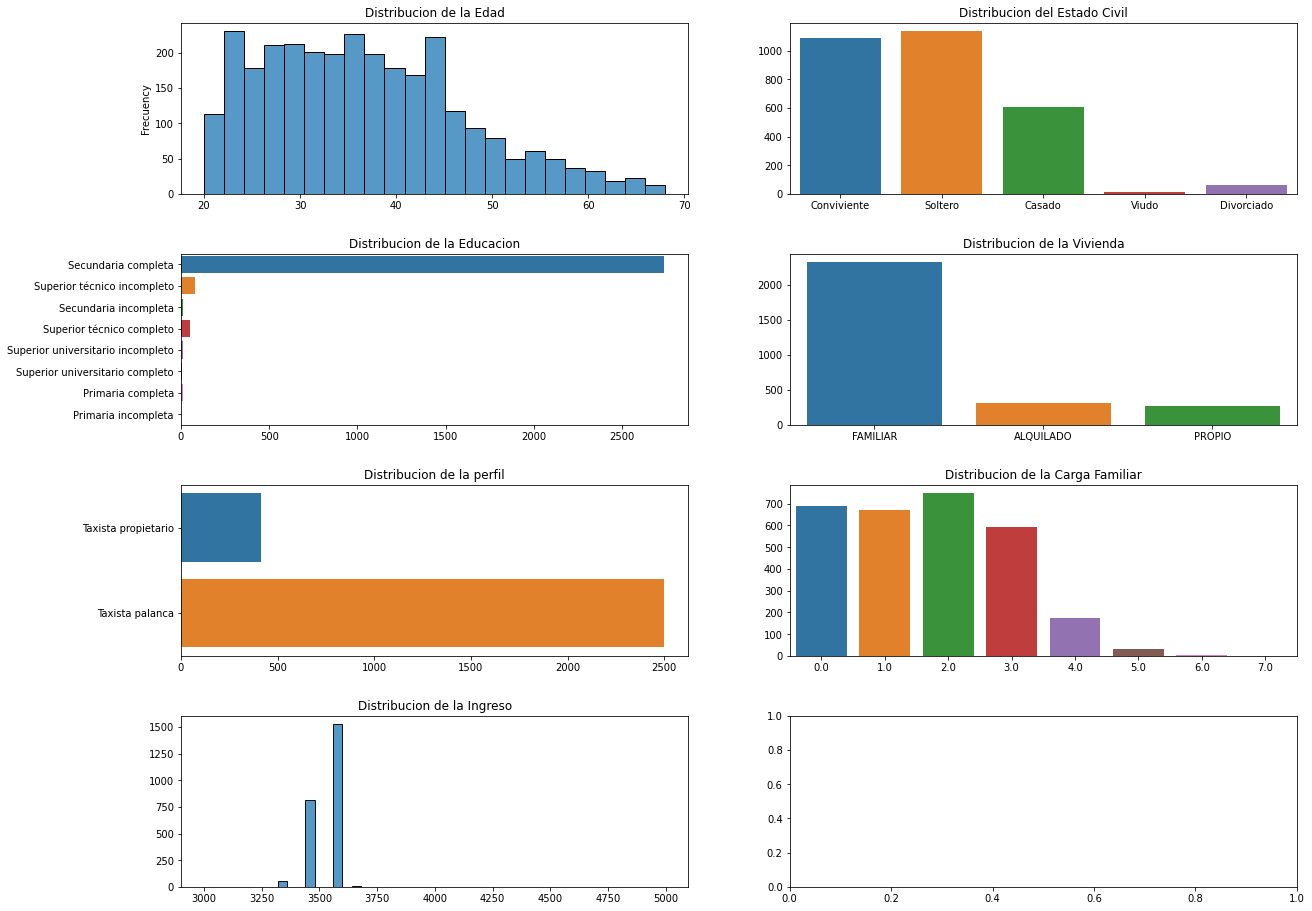

In [36]:
fig, axs = plt.subplots(nrows= 4, ncols=2, figsize=(20,15)) # figsize: ancho x alto
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)

sns.histplot(data = X_train, x = 'edad', ax=axs[0, 0]).set(title = "Distribucion de la Edad", xlabel=None, ylabel = 'Frecuency')
sns.countplot(data = X_train, x = 'estado_civil', ax=axs[0, 1]).set(title = "Distribucion del Estado Civil", xlabel=None, ylabel= None)
sns.countplot(data = X_train, y = 'educacion', ax=axs[1, 0]).set(title = "Distribucion de la Educacion", xlabel=None, ylabel= None)
sns.countplot(data = X_train, x = 'vivienda', ax=axs[1, 1]).set(title = "Distribucion de la Vivienda", xlabel=None, ylabel= None)
sns.countplot(data = X_train, y = 'perfil', ax=axs[2, 0]).set(title = "Distribucion de la perfil", xlabel=None, ylabel= None)
sns.countplot(data = X_train, x = 'carga_fam', ax=axs[2, 1]).set(title = "Distribucion de la Carga Familiar", xlabel=None, ylabel= None)
sns.histplot(data = X_train, x = 'ingreso', ax=axs[3, 0], bins = 50).set(title = "Distribucion de la Ingreso", xlabel=None, ylabel= None)

pass

In [37]:
dict_dem = {
    'dict_educacion' : {
        "Sin estudios": "SinEst_Prim_Sec",
        "Primaria completa": "SinEst_Prim_Sec",
        "Primaria incompleta": "SinEst_Prim_Sec",
        "Secundaria incompleta": "SinEst_Prim_Sec",
        "Secundaria completa": "SinEst_Prim_Sec",
        "Superior técnico incompleto": "Tecnico",
        "Superior técnico completo": "Tecnico",
        "Superior universitario incompleto": "Univ_Postg",
        "Superior universitario completo": "Univ_Postg",
        "Post-grado incompleto": "Univ_Postg",
        "Post-grado": "Univ_Postg",
        "Post-grado completo": "Univ_Postg"
    },
    'dict_perfil' : {
        "Taxista propietario": "5.Propietario",
        "Mototaxista propietario": "5.Propietario",
        "Transportista": "3.Palanca",
        "Taxista palanca": "3.Palanca",
        "Mototaxista palanca": "3.Palanca",
        "Dependiente - Informal": "4.Depen. Formal",
        "Dependiente - Formal": "4.Depen. Formal",
        "Semidependiente - Formal": "4.Depen. Formal",
        "Dependiente - Semiformal": "4.Depen. Formal",
        "Independiente - Formal": "2.Indep. Formal", 
        "Independiente - Informal": "1.Indep. Infor."
    }
}


In [38]:
X_train = X_train.replace({'educacion': dict_dem['dict_educacion']})
X_train = X_train.replace({'perfil': dict_dem['dict_perfil']})

X_train['carga_fam'] = np.where( np.isnan(X_train['carga_fam']), 'Otros/ NULL/ NA', np.where( X_train['carga_fam'] >= 3, "+3", X_train['carga_fam'] ) )
X_train['carga_fam'] = X_train.replace('Otros/ NULL/ NA',np.nan)['carga_fam']

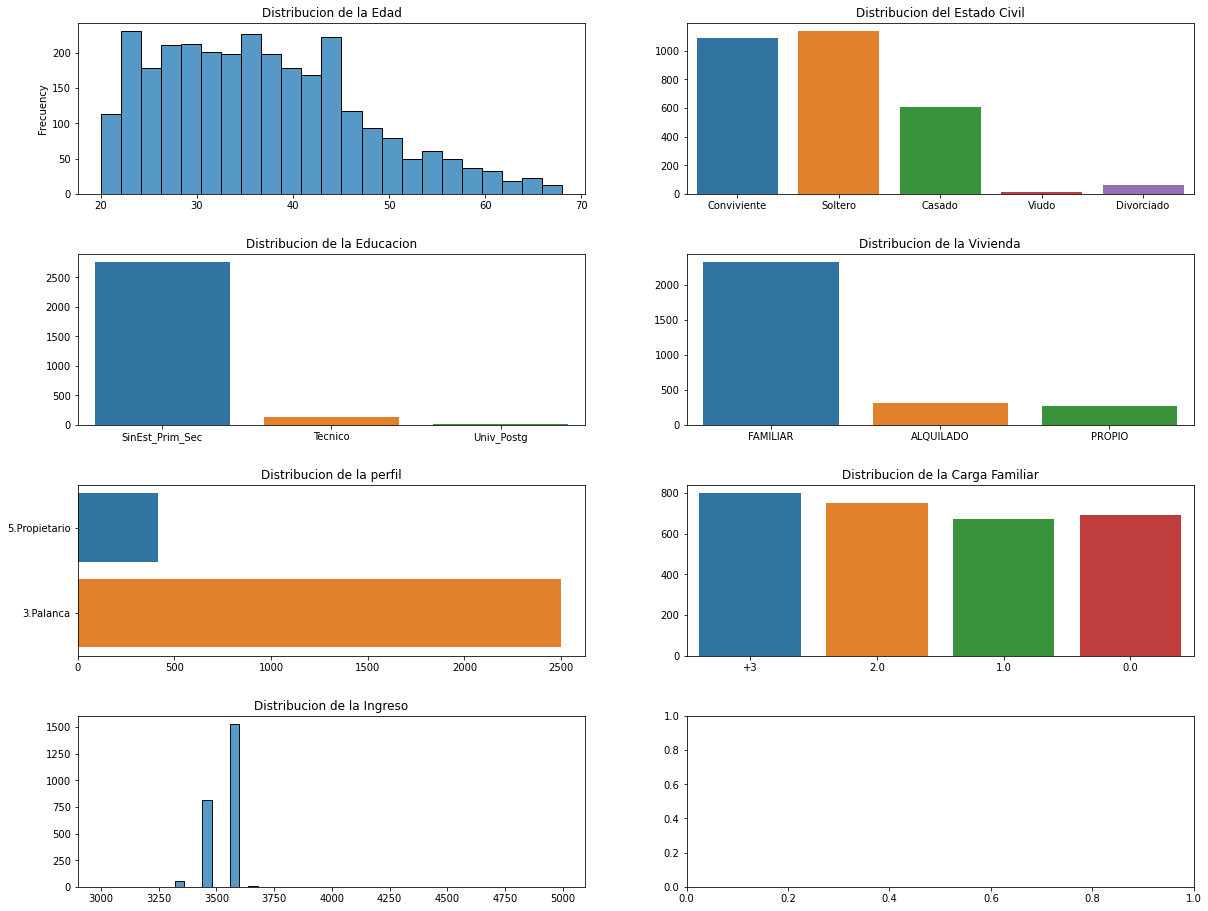

In [39]:
fig, axs = plt.subplots(nrows= 4, ncols=2, figsize=(20,15)) # figsize: ancho x alto
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)

sns.histplot(data = X_train, x = 'edad', ax=axs[0, 0]).set(title = "Distribucion de la Edad", xlabel=None, ylabel = 'Frecuency')
sns.countplot(data = X_train, x = 'estado_civil', ax=axs[0, 1]).set(title = "Distribucion del Estado Civil", xlabel=None, ylabel= None)
sns.countplot(data = X_train, x = 'educacion', ax=axs[1, 0]).set(title = "Distribucion de la Educacion", xlabel=None, ylabel= None)
sns.countplot(data = X_train, x = 'vivienda', ax=axs[1, 1]).set(title = "Distribucion de la Vivienda", xlabel=None, ylabel= None)
sns.countplot(data = X_train, y = 'perfil', ax=axs[2, 0]).set(title = "Distribucion de la perfil", xlabel=None, ylabel= None)
sns.countplot(data = X_train, x = 'carga_fam', ax=axs[2, 1]).set(title = "Distribucion de la Carga Familiar", xlabel=None, ylabel= None)
sns.histplot(data = X_train, x = 'ingreso', ax=axs[3, 0], bins = 50).set(title = "Distribucion de la Ingreso", xlabel=None, ylabel= None)
pass                                        

In [40]:
X_train[inter].dtypes

antiguedad                  float64
cuotas_pend                   int64
cuotas_canc                 float64
saldo_cap                   float64
saldo_int                   float64
saldo_mora                  float64
provision                   float64
garpref                        bool
cap_vig                     float64
cap_ref                     float64
cap_ven                       int64
cap_jud                       int64
mora_prom1m6                float64
mora                        float64
calificacion_conalin          int64
calificacion_sinalin          int64
sobreend                    float64
riesgocc                    float64
refin                        object
refinanciacion              float64
im_pagcof                   float64
carga_gnv                   float64
nro_carga_gnv               float64
cv_carga_gnv                float64
relacion_im_pagcof_cuota    float64
relacion_carga_gnv_cuota    float64
dtype: object

In [41]:
X_train[inter].describe(percentiles=[.01, .05, .1, .25, .5, .75, .9, .95, .99])

,antiguedad,cuotas_pend,cuotas_canc,saldo_cap,saldo_int,saldo_mora,provision,cap_vig,cap_ref,cap_ven,...,calificacion_sinalin,sobreend,riesgocc,refinanciacion,im_pagcof,carga_gnv,nro_carga_gnv,cv_carga_gnv,relacion_im_pagcof_cuota,relacion_carga_gnv_cuota
count,68.000000,2914.000000,0.0,2914.000000,2914.000000,2914.0,2914.000000,2914.000000,2914.0,2914.0,...,2914.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2.955882,48.199725,NaN,38907.245494,10.456126,0.0,2451.970889,38907.245494,0.0,0.0,...,0.023336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.028458,20.013811,NaN,6370.429324,69.146786,0.0,6633.125561,6370.429324,0.0,0.0,...,0.239014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,7.000000,NaN,8731.870000,0.000000,0.0,87.320000,8731.870000,0.0,0.0,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1%,1.000000,35.000000,NaN,24221.301300,0.000000,0.0,247.493900,24221.301300,0.0,0.0,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5%,2.000000,36.000000,NaN,28994.367500,0.000000,0.0,292.541500,28994.367500,0.0,0.0,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10%,2.000000,40.000000,NaN,30648.252000,0.000000,0.0,307.576000,30648.252000,0.0,0.0,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.000000,42.000000,NaN,34914.540000,0.000000,0.0,350.780000,34914.540000,0.0,0.0,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.000000,48.000000,NaN,38594.385000,0.000000,0.0,397.110000,38594.385000,0.0,0.0,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.250000,48.000000,NaN,43537.610000,0.000000,0.0,459.412500,43537.610000,0.0,0.0,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
X_train[inter].describe(include = 'object')

,refin
count,2914
unique,1
top,False
freq,2914


### Graficos Internas

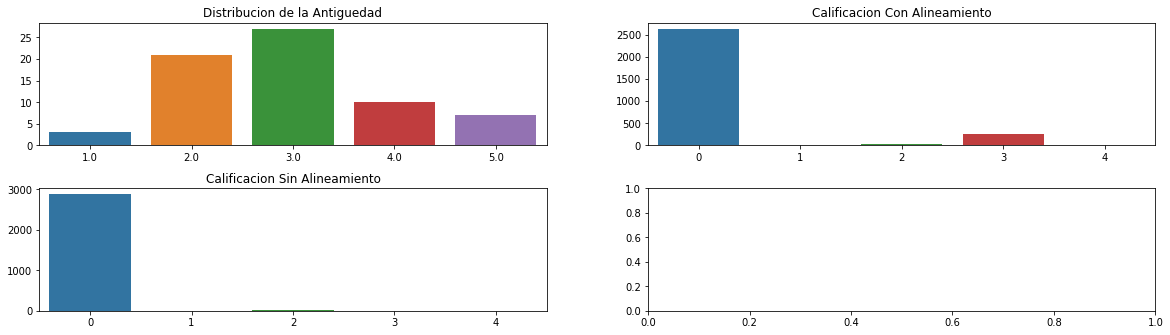

In [43]:
fig, axs = plt.subplots(nrows= 2, ncols=2, figsize=(20,5)) # figsize: ancho x alto
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)

sns.countplot(data = X_train, x = 'antiguedad', ax=axs[0, 0]).set(title = "Distribucion de la Antiguedad", xlabel=None, ylabel= None)
sns.countplot(data = X_train, x = 'calificacion_conalin', ax=axs[0, 1]).set(title = "Calificacion Con Alineamiento", xlabel=None, ylabel= None)
sns.countplot(data = X_train, x = 'calificacion_sinalin', ax=axs[1, 0]).set(title = "Calificacion Sin Alineamiento", xlabel=None, ylabel= None)

pass

In [44]:
mapping_calificacion = {0: 'Normal', 1: 'CPP', 2: 'Deficiente', 3: 'Dudoso', 4:'Perdida'}

X_train['calificacion_conalin'] = X_train['calificacion_conalin'].map(mapping_calificacion)
X_train['calificacion_sinalin'] = X_train['calificacion_sinalin'].map(mapping_calificacion)

X_train['ci_pv'] = np.where(np.isnan(X_train['pv']), np.nan, np.where(X_train['pv'] <= 0, np.nan,X_train['ci']/X_train['pv']))

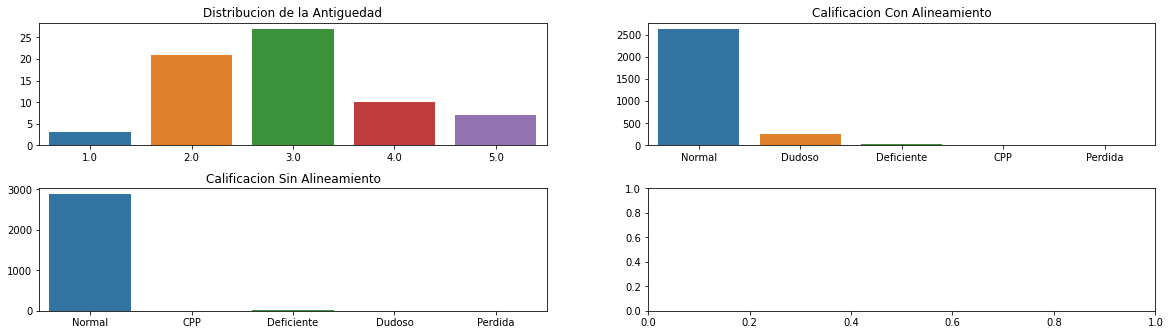

In [45]:
fig, axs = plt.subplots(nrows= 2, ncols=2, figsize=(20,5)) # figsize: ancho x alto
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)

sns.countplot(data = X_train, x = 'antiguedad', ax=axs[0, 0]).set(title = "Distribucion de la Antiguedad", xlabel=None, ylabel= None)
sns.countplot(data = X_train, x = 'calificacion_conalin', ax=axs[0, 1]).set(title = "Calificacion Con Alineamiento", xlabel=None, ylabel= None)
sns.countplot(data = X_train, x = 'calificacion_sinalin', ax=axs[1, 0]).set(title = "Calificacion Sin Alineamiento", xlabel=None, ylabel= None)

pass

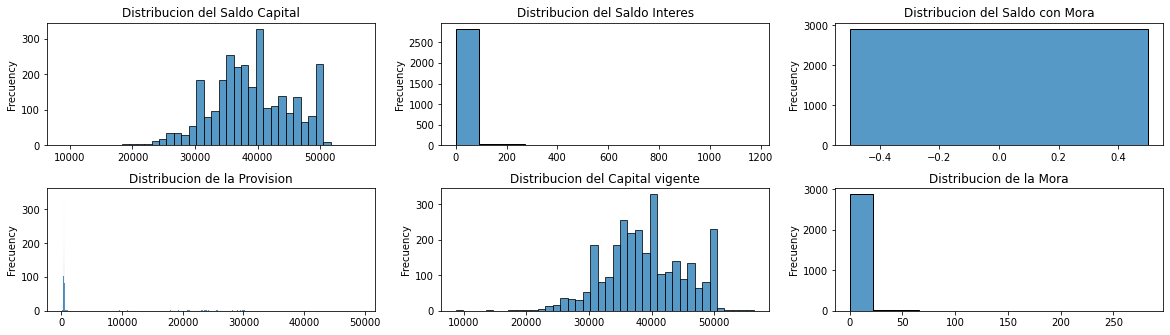

In [46]:
fig, axs = plt.subplots(nrows= 2, ncols=3, figsize=(20,5)) # figsize: ancho x alto
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)

sns.histplot(data = X_train, x = 'saldo_cap', ax=axs[0, 0]).set(title = "Distribucion del Saldo Capital", xlabel=None, ylabel = 'Frecuency')
sns.histplot(data = X_train, x = 'saldo_int', ax=axs[0, 1]).set(title = "Distribucion del Saldo Interes", xlabel=None, ylabel = 'Frecuency')
sns.histplot(data = X_train, x = 'saldo_mora', ax=axs[0, 2]).set(title = "Distribucion del Saldo con Mora", xlabel=None, ylabel = 'Frecuency')
sns.histplot(data = X_train, x = 'provision', ax=axs[1, 0]).set(title = "Distribucion de la Provision", xlabel=None, ylabel = 'Frecuency')
sns.histplot(data = X_train, x = 'cap_vig', ax=axs[1, 1]).set(title = "Distribucion del Capital vigente", xlabel=None, ylabel = 'Frecuency')
sns.histplot(data = X_train, x = 'mora', ax=axs[1, 2]).set(title = "Distribucion de la Mora", xlabel=None, ylabel = 'Frecuency')
# sns.histplot(data = X_train, x = 'nro_carga_gnv', ax=axs[2, 0]).set(title = "Distribucion de la Cantidad de cargas GNV", xlabel=None, ylabel = 'Frecuency')
# sns.histplot(data = X_train, x = 'cv_carga_gnv', ax=axs[2, 1]).set(title = "Distribucion del Coeficiente de Variacion carga GNV", xlabel=None, ylabel = 'Frecuency')
# sns.histplot(data = X_train, x = 'relacion_carga_gnv_cuota', ax=axs[2, 2]).set(title = "Distribucion de la Relacion carga GNV cuota", xlabel=None, ylabel = 'Frecuency')

pass

In [47]:
## Imputacion por logica

# Recencia
X_train['rec_calificacion_0_1m12'] = np.where(X_train['rec_calificacion_0_1m12']>= 0, round(X_train['rec_calificacion_0_1m12']).astype('str'), 'Otros')
X_train['rec_calificacion_1234_1m12'] = np.where(X_train['rec_calificacion_1234_1m12'] >= 0, round(X_train['rec_calificacion_1234_1m12']).astype('str'), 'Otros')
X_train['rec_calificacion_234_1m12'] = np.where(X_train['rec_calificacion_234_1m12'] >= 0, round(X_train['rec_calificacion_234_1m12']).astype('str'), 'Otros')
X_train['rec_calificacion_34_1m12'] = np.where(X_train['rec_calificacion_34_1m12'] >= 0, round(X_train['rec_calificacion_34_1m12']).astype('str'), 'Otros')
X_train['rec_calificacion_4_1m12'] = np.where(X_train['rec_calificacion_4_1m12'] >= 0, round(X_train['rec_calificacion_4_1m12']).astype('str'), 'Otros')
X_train['rec_mora_0_1m12'] = np.where(X_train['rec_mora_0_1m12'] >= 0, round(X_train['rec_mora_0_1m12']).astype('str'), 'Otros')
X_train['rec_mora0_1m12'] = np.where(X_train['rec_mora0_1m12'] >= 0, round(X_train['rec_mora0_1m12']).astype('str'), 'Otros')
X_train['rec_mora120_1m12'] = np.where(X_train['rec_mora120_1m12'] >= 0, round(X_train['rec_mora120_1m12']).astype('str'), 'Otros')
X_train['rec_mora30_1m12'] = np.where(X_train['rec_mora30_1m12'] >= 0, round(X_train['rec_mora30_1m12']).astype('str'), 'Otros')
X_train['rec_mora60_1m12'] = np.where(X_train['rec_mora60_1m12'] >= 0, round(X_train['rec_mora60_1m12']).astype('str'), 'Otros')
X_train['rec_mora90_1m12'] = np.where(X_train['rec_mora90_1m12'] >= 0, round(X_train['rec_mora90_1m12']).astype('str'), 'Otros')
X_train['rec_por_cal0_100_1m12'] = np.where(X_train['rec_por_cal0_100_1m12'] >= 0, round(X_train['rec_por_cal0_100_1m12']).astype('str'), 'Otros')
X_train['rec_por_cal4_100_1m12'] = np.where(X_train['rec_por_cal4_100_1m12'] >= 0, round(X_train['rec_por_cal4_100_1m12']).astype('str'), 'Otros')

## Linea y disposicion de efectivo (flag sin o con disposicion de efectivo o linea)
X_train['disp_efectivo_max1m12_flg'] = np.where(np.isnan(X_train['disp_efectivo_max1m12']), 'SinEfectivo', 'ConEfectivo')
X_train['disp_efectivo_1m_flg'] = np.where(np.isnan(X_train['disp_efectivo_1m']), 'SinEfectivo', 'ConEfectivo')
X_train['disp_efectivo_max1m3_flg'] = np.where(np.isnan(X_train['disp_efectivo_max1m3']), 'SinEfectivo', 'ConEfectivo')
X_train['disp_efectivo_max1m6_flg'] = np.where(np.isnan(X_train['disp_efectivo_max1m6']), 'SinEfectivo', 'ConEfectivo')
X_train['linea_activa_1m_flg'] = np.where(np.isnan(X_train['linea_activa_1m']), 'SinLinea', 'ConLinea')
X_train['linea_activa_max1m12_flg'] = np.where(np.isnan(X_train['linea_activa_max1m12']), 'SinLinea', 'ConLinea')
X_train['linea_activa_max1m3_flg'] = np.where(np.isnan(X_train['linea_activa_max1m3']), 'SinLinea', 'ConLinea')
X_train['linea_activa_max1m6_flg'] = np.where(np.isnan(X_train['linea_activa_max1m6']), 'SinLinea', 'ConLinea')
X_train['linea_total_1m_flg'] = np.where(np.isnan(X_train['linea_total_1m']), 'SinLinea', 'ConLinea')
X_train['linea_total_max1m12_flg'] = np.where(np.isnan(X_train['linea_total_max1m12']), 'SinLinea', 'ConLinea')
X_train['linea_total_max1m3_flg'] = np.where(np.isnan(X_train['linea_total_max1m3']), 'SinLinea', 'ConLinea')
X_train['linea_total_max1m6_flg'] = np.where(np.isnan(X_train['linea_total_max1m6']), 'SinLinea', 'ConLinea')
X_train['linea_usada_1m_flg'] = np.where(np.isnan(X_train['linea_usada_1m']), 'SinLinea', 'ConLinea')
X_train['linea_usada_max1m12_flg'] = np.where(np.isnan(X_train['linea_usada_max1m12']), 'SinLinea', 'ConLinea')
X_train['linea_usada_max1m3_flg'] = np.where(np.isnan(X_train['linea_usada_max1m3']), 'SinLinea', 'ConLinea')
X_train['linea_usada_max1m6_flg'] = np.where(np.isnan(X_train['linea_usada_max1m6']), 'SinLinea', 'ConLinea')


In [48]:
rcc_new = [
    'disp_efectivo_max1m12_flg','disp_efectivo_1m_flg','disp_efectivo_max1m3_flg','disp_efectivo_max1m6_flg','linea_activa_1m_flg','linea_activa_max1m12_flg','linea_activa_max1m3_flg','linea_activa_max1m6_flg','linea_total_1m_flg','linea_total_max1m12_flg','linea_total_max1m3_flg','linea_total_max1m6_flg','linea_usada_1m_flg','linea_usada_max1m12_flg','linea_usada_max1m3_flg','linea_usada_max1m6_flg'
]
rcc = np.unique( np.concatenate( (rcc, rcc_new), axis=None) )

In [49]:
X_train.dtypes

edad                        int64
educacion                  object
estado_civil               object
vivienda                   object
perfil                     object
                            ...  
linea_total_max1m6_flg     object
linea_usada_1m_flg         object
linea_usada_max1m12_flg    object
linea_usada_max1m3_flg     object
linea_usada_max1m6_flg     object
Length: 347, dtype: object

## Tratamiento de valores nulos

<AxesSubplot:>

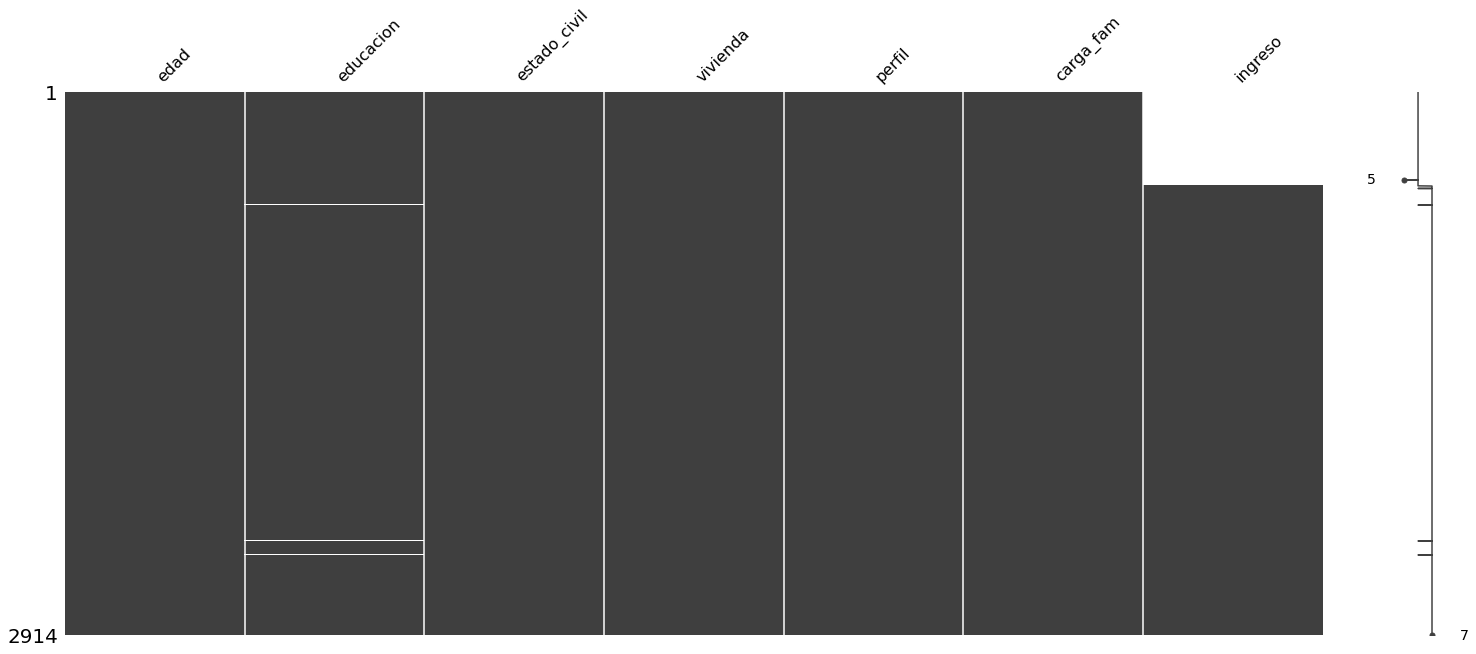

In [50]:
msno.matrix(X_train[demo])

<AxesSubplot:>

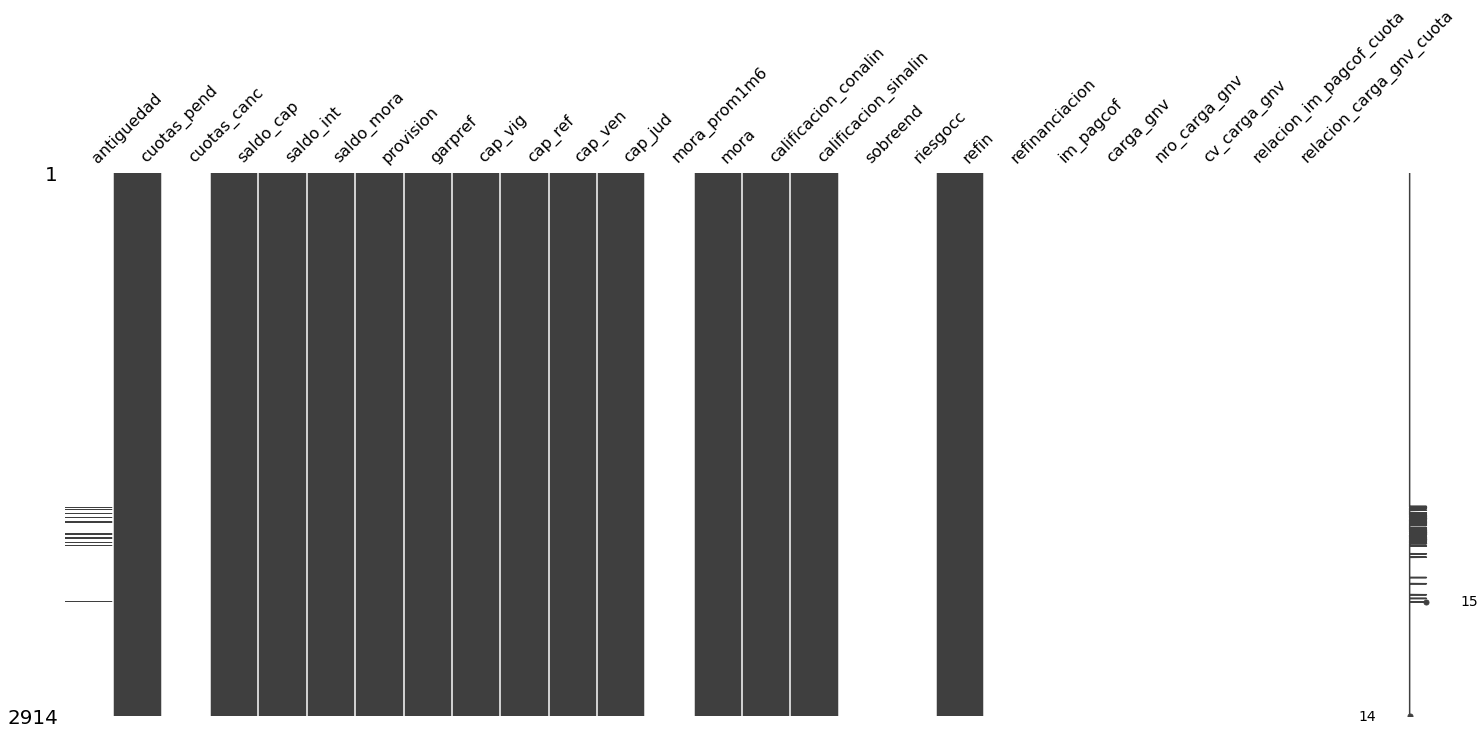

In [51]:
msno.matrix(X_train[inter])

<AxesSubplot:>

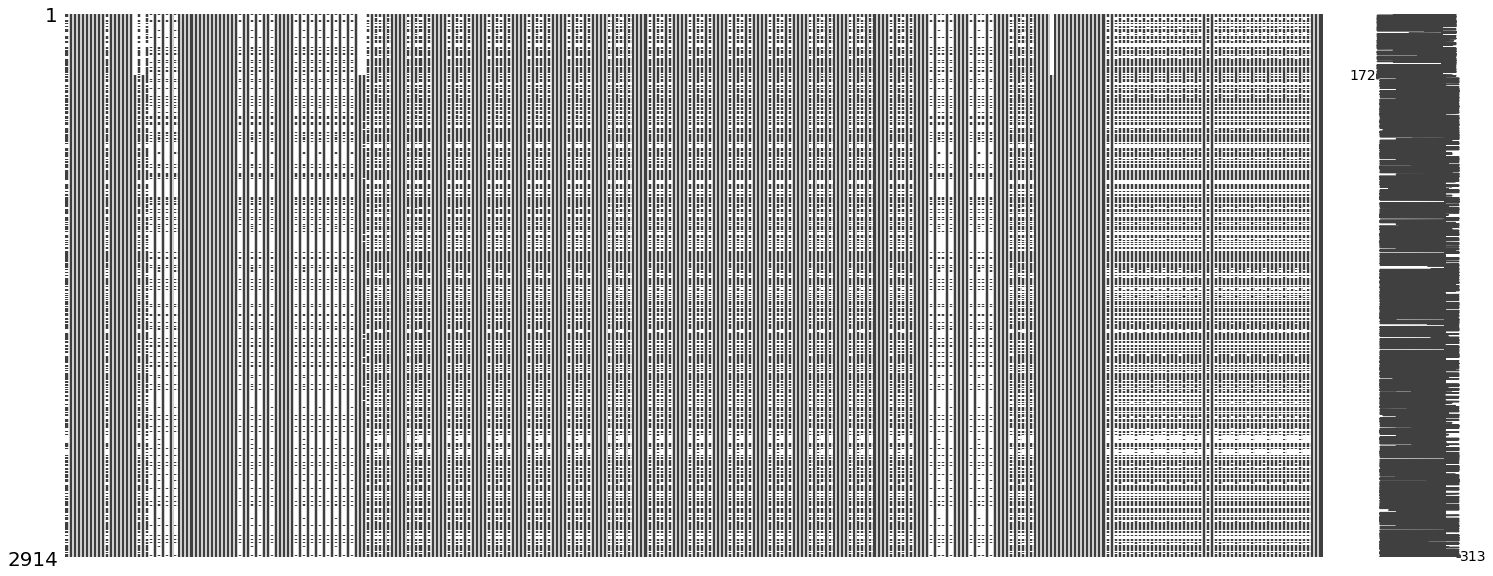

In [52]:
msno.matrix(X_train[rcc])

In [53]:
X_train.select_dtypes('number').head(2)

,edad,ingreso,maf,ci,cuota,pv,antiguedad,cuotas_pend,cuotas_canc,saldo_cap,...,frec_calificacion_34_1m12,frec_calificacion_234_1m12,frec_calificacion_1234_1m12,frec_mora_0_1m12,frec_mora0_1m12,frec_mora30_1m12,frec_mora60_1m12,frec_mora90_1m12,frec_mora120_1m12,ci_pv
180,42,NaN,NaN,NaN,NaN,NaN,NaN,48,NaN,35367.0,...,0,1,2,5,5,1,0,0,0,NaN
181,48,NaN,NaN,NaN,NaN,NaN,NaN,48,NaN,37426.0,...,4,4,4,0,12,12,12,12,12,NaN


In [54]:
X_train.select_dtypes('object').head(2)

,educacion,estado_civil,vivienda,perfil,carga_fam,marca,calificacion_conalin,calificacion_sinalin,refin,rec_por_cal0_100_1m12,...,linea_activa_max1m3_flg,linea_activa_max1m6_flg,linea_total_1m_flg,linea_total_max1m12_flg,linea_total_max1m3_flg,linea_total_max1m6_flg,linea_usada_1m_flg,linea_usada_max1m12_flg,linea_usada_max1m3_flg,linea_usada_max1m6_flg
180,SinEst_Prim_Sec,Conviviente,FAMILIAR,5.Propietario,+3,NaN,Normal,Normal,False,3.0,...,ConLinea,ConLinea,ConLinea,ConLinea,ConLinea,ConLinea,ConLinea,ConLinea,ConLinea,ConLinea
181,SinEst_Prim_Sec,Soltero,FAMILIAR,5.Propietario,+3,NaN,Normal,Normal,False,Otros,...,SinLinea,SinLinea,SinLinea,SinLinea,SinLinea,SinLinea,SinLinea,SinLinea,SinLinea,SinLinea


In [55]:
X_train_num = X_train.select_dtypes('number')
X_train_cat = X_train.select_dtypes('object')

In [56]:
X_train_num.shape, X_train_cat.shape

((2914, 182), (2914, 164))

In [57]:
X_train_num.head(2)

,edad,ingreso,maf,ci,cuota,pv,antiguedad,cuotas_pend,cuotas_canc,saldo_cap,...,frec_calificacion_34_1m12,frec_calificacion_234_1m12,frec_calificacion_1234_1m12,frec_mora_0_1m12,frec_mora0_1m12,frec_mora30_1m12,frec_mora60_1m12,frec_mora90_1m12,frec_mora120_1m12,ci_pv
180,42,NaN,NaN,NaN,NaN,NaN,NaN,48,NaN,35367.0,...,0,1,2,5,5,1,0,0,0,NaN
181,48,NaN,NaN,NaN,NaN,NaN,NaN,48,NaN,37426.0,...,4,4,4,0,12,12,12,12,12,NaN


In [58]:
X_train_cat.head(2)

,educacion,estado_civil,vivienda,perfil,carga_fam,marca,calificacion_conalin,calificacion_sinalin,refin,rec_por_cal0_100_1m12,...,linea_activa_max1m3_flg,linea_activa_max1m6_flg,linea_total_1m_flg,linea_total_max1m12_flg,linea_total_max1m3_flg,linea_total_max1m6_flg,linea_usada_1m_flg,linea_usada_max1m12_flg,linea_usada_max1m3_flg,linea_usada_max1m6_flg
180,SinEst_Prim_Sec,Conviviente,FAMILIAR,5.Propietario,+3,NaN,Normal,Normal,False,3.0,...,ConLinea,ConLinea,ConLinea,ConLinea,ConLinea,ConLinea,ConLinea,ConLinea,ConLinea,ConLinea
181,SinEst_Prim_Sec,Soltero,FAMILIAR,5.Propietario,+3,NaN,Normal,Normal,False,Otros,...,SinLinea,SinLinea,SinLinea,SinLinea,SinLinea,SinLinea,SinLinea,SinLinea,SinLinea,SinLinea


### Aplicacion en Test

In [59]:
X_test = X_test.replace({'educacion': dict_dem['dict_educacion']})
X_test = X_test.replace({'perfil': dict_dem['dict_perfil']})

X_test['carga_fam'] = np.where( np.isnan(X_test['carga_fam']), 'Otros/ NULL/ NA', np.where( X_test['carga_fam'] >= 3, "+3", X_test['carga_fam'] ) )
X_test['carga_fam'] = X_test.replace('Otros/ NULL/ NA',np.nan)['carga_fam']

In [60]:
X_test['calificacion_conalin'] = X_test['calificacion_conalin'].map(mapping_calificacion)
X_test['calificacion_sinalin'] = X_test['calificacion_sinalin'].map(mapping_calificacion)
X_test['ci_pv'] = np.where(np.isnan(X_test['pv']), np.nan, np.where(X_test['pv'] <= 0, np.nan,X_test['ci']/X_test['pv']))

In [61]:
## Imputacion por logica

# Recencia
X_test['rec_calificacion_0_1m12'] = np.where(X_test['rec_calificacion_0_1m12']>= 0, round(X_test['rec_calificacion_0_1m12']).astype('str'), 'Otros')
X_test['rec_calificacion_1234_1m12'] = np.where(X_test['rec_calificacion_1234_1m12'] >= 0, round(X_test['rec_calificacion_1234_1m12']).astype('str'), 'Otros')
X_test['rec_calificacion_234_1m12'] = np.where(X_test['rec_calificacion_234_1m12'] >= 0, round(X_test['rec_calificacion_234_1m12']).astype('str'), 'Otros')
X_test['rec_calificacion_34_1m12'] = np.where(X_test['rec_calificacion_34_1m12'] >= 0, round(X_test['rec_calificacion_34_1m12']).astype('str'), 'Otros')
X_test['rec_calificacion_4_1m12'] = np.where(X_test['rec_calificacion_4_1m12'] >= 0, round(X_test['rec_calificacion_4_1m12']).astype('str'), 'Otros')
X_test['rec_mora_0_1m12'] = np.where(X_test['rec_mora_0_1m12'] >= 0, round(X_test['rec_mora_0_1m12']).astype('str'), 'Otros')
X_test['rec_mora0_1m12'] = np.where(X_test['rec_mora0_1m12'] >= 0, round(X_test['rec_mora0_1m12']).astype('str'), 'Otros')
X_test['rec_mora120_1m12'] = np.where(X_test['rec_mora120_1m12'] >= 0, round(X_test['rec_mora120_1m12']).astype('str'), 'Otros')
X_test['rec_mora30_1m12'] = np.where(X_test['rec_mora30_1m12'] >= 0, round(X_test['rec_mora30_1m12']).astype('str'), 'Otros')
X_test['rec_mora60_1m12'] = np.where(X_test['rec_mora60_1m12'] >= 0, round(X_test['rec_mora60_1m12']).astype('str'), 'Otros')
X_test['rec_mora90_1m12'] = np.where(X_test['rec_mora90_1m12'] >= 0, round(X_test['rec_mora90_1m12']).astype('str'), 'Otros')
X_test['rec_por_cal0_100_1m12'] = np.where(X_test['rec_por_cal0_100_1m12'] >= 0, round(X_test['rec_por_cal0_100_1m12']).astype('str'), 'Otros')
X_test['rec_por_cal4_100_1m12'] = np.where(X_test['rec_por_cal4_100_1m12'] >= 0, round(X_test['rec_por_cal4_100_1m12']).astype('str'), 'Otros')

## Linea y disposicion de efectivo (flag sin o con disposicion de efectivo o linea)
X_test['disp_efectivo_max1m12_flg'] = np.where(np.isnan(X_test['disp_efectivo_max1m12']), 'SinEfectivo', 'ConEfectivo')
X_test['disp_efectivo_1m_flg'] = np.where(np.isnan(X_test['disp_efectivo_1m']), 'SinEfectivo', 'ConEfectivo')
X_test['disp_efectivo_max1m3_flg'] = np.where(np.isnan(X_test['disp_efectivo_max1m3']), 'SinEfectivo', 'ConEfectivo')
X_test['disp_efectivo_max1m6_flg'] = np.where(np.isnan(X_test['disp_efectivo_max1m6']), 'SinEfectivo', 'ConEfectivo')
X_test['linea_activa_1m_flg'] = np.where(np.isnan(X_test['linea_activa_1m']), 'SinLinea', 'ConLinea')
X_test['linea_activa_max1m12_flg'] = np.where(np.isnan(X_test['linea_activa_max1m12']), 'SinLinea', 'ConLinea')
X_test['linea_activa_max1m3_flg'] = np.where(np.isnan(X_test['linea_activa_max1m3']), 'SinLinea', 'ConLinea')
X_test['linea_activa_max1m6_flg'] = np.where(np.isnan(X_test['linea_activa_max1m6']), 'SinLinea', 'ConLinea')
X_test['linea_total_1m_flg'] = np.where(np.isnan(X_test['linea_total_1m']), 'SinLinea', 'ConLinea')
X_test['linea_total_max1m12_flg'] = np.where(np.isnan(X_test['linea_total_max1m12']), 'SinLinea', 'ConLinea')
X_test['linea_total_max1m3_flg'] = np.where(np.isnan(X_test['linea_total_max1m3']), 'SinLinea', 'ConLinea')
X_test['linea_total_max1m6_flg'] = np.where(np.isnan(X_test['linea_total_max1m6']), 'SinLinea', 'ConLinea')
X_test['linea_usada_1m_flg'] = np.where(np.isnan(X_test['linea_usada_1m']), 'SinLinea', 'ConLinea')
X_test['linea_usada_max1m12_flg'] = np.where(np.isnan(X_test['linea_usada_max1m12']), 'SinLinea', 'ConLinea')
X_test['linea_usada_max1m3_flg'] = np.where(np.isnan(X_test['linea_usada_max1m3']), 'SinLinea', 'ConLinea')
X_test['linea_usada_max1m6_flg'] = np.where(np.isnan(X_test['linea_usada_max1m6']), 'SinLinea', 'ConLinea')

In [62]:
X_test_num = X_test.select_dtypes('number')
X_test_cat = X_test.select_dtypes('object')

### Base Final (en python, continua en R)

In [63]:
path = '../bases/train_test/'

In [67]:
X_train_num.to_csv(path + 'X_train_num.csv')
X_train_cat.to_csv(path + 'X_train_cat.csv')
X_test_num.to_csv(path + 'X_test_num.csv')
X_test_cat.to_csv(path + 'X_test_cat.csv')
y_train.to_csv(path + 'y_train.csv')
y_test.to_csv(path + 'y_test.csv')

## Continua en R

In [63]:
# Fin !!